In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from google.colab import data_table
from vega_datasets import data
data_table.enable_dataframe_formatter()

In [83]:
crop_data=pd.read_csv("Kerala.csv") #,na_values= '#DIV/0!'
crop_data

State_Name  District_Name  Crop_Year  Season          Crop      Area  \
0        Kerala              1       1997       0      Arecanut   2253.00   
1        Kerala              1       1997       0  Black pepper   2235.00   
2        Kerala              1       1997       0     Cashewnut   7205.00   
3        Kerala              1       1997       0      Coconut   77893.00   
4        Kerala              1       1997       0       Tapioca   3911.00   
...         ...            ...        ...     ...           ...       ...   
4256     Kerala             14       2014       0     Sugarcane      0.75   
4257     Kerala             14       2014       0  Sweet potato      8.00   
4258     Kerala             14       2014       0       Tapioca   2327.00   
4259     Kerala             14       2014       0      Turmeric    161.00   
4260     Kerala             14       2014       4          Rice   8651.00   

      Production  
0         1518.0  
1          248.0  
2         2358.0  
3       399000.0  
4        74110.0  
...          ...  
4256         NaN  
4257       127.0  
4258     99788.0  
4259       481.0  
4260     23324.0  

[4261 rows x 7 columns]

In [84]:
crop_data.shape

(4261, 7)

In [85]:
crop_data.describe()

District_Name   Crop_Year       Season           Area    Production
count    4261.000000  4261.00000  4261.000000    4261.000000  4.003000e+03
mean        7.472424  2005.84675     0.579911    7488.400218  2.445167e+07
std         3.996830     5.01928     1.183220   17920.826657  1.169061e+08
min         1.000000  1997.00000     0.000000       0.040000  0.000000e+00
25%         4.000000  2002.00000     0.000000     106.000000  2.320000e+02
50%         7.000000  2005.00000     0.000000    1387.000000  1.690000e+03
75%        11.000000  2011.00000     0.000000    5651.000000  1.696650e+04
max        14.000000  2014.00000     4.000000  137554.000000  1.125000e+09

In [86]:
crop_data.isnull().sum()

State_Name         0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area               0
Production       258
dtype: int64

In [87]:
crop_data['Yield'] = (crop_data['Production'] / crop_data['Area'])
crop_data

State_Name  District_Name  Crop_Year  Season          Crop      Area  \
0        Kerala              1       1997       0      Arecanut   2253.00   
1        Kerala              1       1997       0  Black pepper   2235.00   
2        Kerala              1       1997       0     Cashewnut   7205.00   
3        Kerala              1       1997       0      Coconut   77893.00   
4        Kerala              1       1997       0       Tapioca   3911.00   
...         ...            ...        ...     ...           ...       ...   
4256     Kerala             14       2014       0     Sugarcane      0.75   
4257     Kerala             14       2014       0  Sweet potato      8.00   
4258     Kerala             14       2014       0       Tapioca   2327.00   
4259     Kerala             14       2014       0      Turmeric    161.00   
4260     Kerala             14       2014       4          Rice   8651.00   

      Production      Yield  
0         1518.0   0.673768  
1          248.0   0.110962  
2         2358.0   0.327273  
3       399000.0   5.122412  
4        74110.0  18.949118  
...          ...        ...  
4256         NaN        NaN  
4257       127.0  15.875000  
4258     99788.0  42.882682  
4259       481.0   2.987578  
4260     23324.0   2.696104  

[4261 rows x 8 columns]

In [88]:
crop_data = crop_data.dropna()

In [89]:
crop_data.Crop.unique()

array(['Arecanut', 'Black pepper', 'Cashewnut', 'Coconut ', 'Tapioca',
       'Rice', 'Sesamum', 'Banana', 'Dry ginger', 'Sugarcane',
       'Sweet potato', 'Turmeric', 'Rubber', 'Bhindi', 'Bitter Gourd',
       'Brinjal', 'Cashewnut Raw', 'Drum Stick', 'Jack Fruit', 'Mango',
       'Other Fresh Fruits', 'other oilseeds', 'Other Vegetables',
       'Papaya', 'Pineapple', 'Snak Guard', 'Small millets', 'Ragi',
       'Potato', 'Dry chillies', 'Tea', 'Jowar', 'Cardamom', 'Garlic',
       'Coffee', 'Other Cereals & Millets', 'Arhar/Tur', 'Maize', 'Wheat',
       'Tobacco', 'Cotton(lint)', 'Groundnut', 'Soyabean'], dtype=object)

In [90]:
crop_data.Crop.value_counts()

Rice                       694
Arecanut                   252
Cashewnut                  252
Coconut                    252
Tapioca                    252
Black pepper               252
Banana                     238
Dry ginger                 238
Turmeric                   238
Sweet potato               197
Sugarcane                  170
Sesamum                    154
Cardamom                   105
Mango                       57
Drum Stick                  57
Jowar                       46
Pineapple                   43
Papaya                      43
Ragi                        42
Other Vegetables            28
Rubber                      28
Snak Guard                  28
Brinjal                     28
Bhindi                      28
Other Fresh Fruits          28
Bitter Gourd                28
Jack Fruit                  28
Groundnut                   18
Potato                      18
Other Cereals & Millets     18
Tobacco                     16
Tea                         16
Dry chil

In [91]:
df=crop_data[crop_data['Crop'] == 'Rubber'].describe()
df

District_Name    Crop_Year  Season           Area     Production  \
count      28.000000    28.000000    28.0      28.000000      28.000000   
mean        7.500000  2001.500000     0.0   33967.357143   41973.821429   
std         4.105101     0.509175     0.0   26279.508965   34043.788517   
min         1.000000  2001.000000     0.0    3825.000000    4038.000000   
25%         4.000000  2001.000000     0.0   17587.000000   23338.500000   
50%         7.500000  2001.500000     0.0   29163.500000   34044.500000   
75%        11.000000  2002.000000     0.0   38154.750000   47237.000000   
max        14.000000  2002.000000     0.0  111776.000000  143244.000000   

           Yield  
count  28.000000  
mean    1.192551  
std     0.178601  
min     0.626047  
25%     1.140286  
50%     1.190026  
75%     1.300439  
max     1.487907

In [92]:
df=crop_data[crop_data['Crop'] == 'Rice'].describe()
df

District_Name    Crop_Year      Season          Area     Production  \
count     694.000000   694.000000  694.000000    694.000000     694.000000   
mean        7.347262  2006.018732    2.706052   6502.771239   15264.189597   
std         3.958900     4.901741    1.237949  10608.903225   25320.906802   
min         1.000000  1998.000000    1.000000      1.000000       2.000000   
25%         4.000000  2002.000000    1.000000    956.340000    2221.792500   
50%         7.000000  2006.000000    3.000000   2910.000000    6527.245000   
75%        11.000000  2010.000000    4.000000   7258.500000   17484.500000   
max        14.000000  2014.000000    4.000000  64190.000000  153728.000000   

            Yield  
count  694.000000  
mean     2.258970  
std      0.535744  
min      0.312500  
25%      1.946374  
50%      2.252750  
75%      2.583343  
max      3.905670

In [93]:
df=crop_data[crop_data['Crop'] == 'Coconut '].describe()
df

District_Name    Crop_Year  Season           Area    Production  \
count     252.000000   252.000000   252.0     252.000000  2.520000e+02   
mean        7.500000  2005.500000     0.0   61524.016151  3.881073e+08   
std         4.039151     5.198452     0.0   33747.447806  2.760762e+08   
min         1.000000  1997.000000     0.0    5278.000000  1.300000e+04   
25%         4.000000  2001.000000     0.0   35959.500000  1.260000e+08   
50%         7.500000  2005.500000     0.0   58475.000000  3.778770e+08   
75%        11.000000  2010.000000     0.0   85581.250000  5.690930e+08   
max        14.000000  2014.000000     0.0  137554.000000  1.125000e+09   

              Yield  
count    252.000000  
mean    5944.032734  
std     2015.156711  
min        2.463054  
25%     5129.395289  
50%     6306.290641  
75%     7177.261504  
max    11051.715759

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


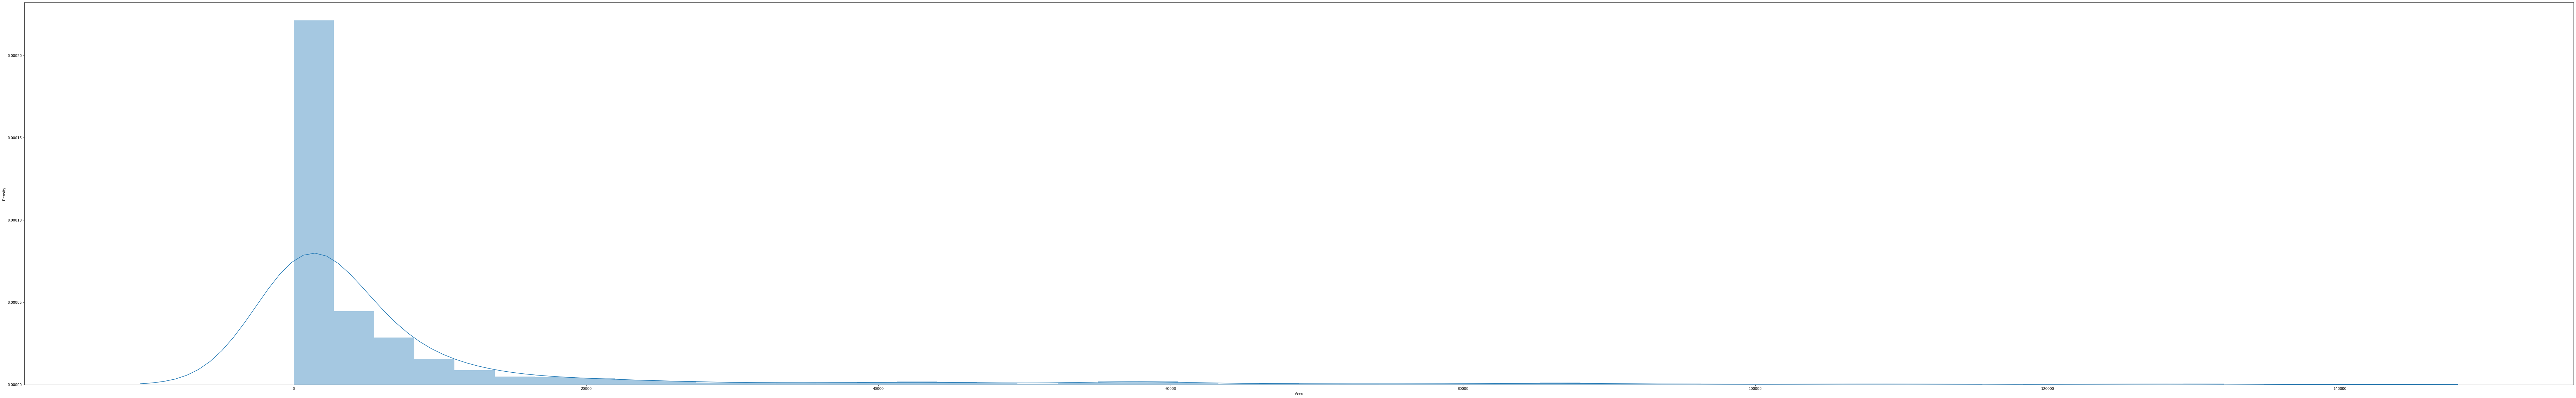

In [94]:
target=crop_data['Area']
sns.distplot(target,hist=True)

In [95]:
# target2=crop_data['Yield']
# plt.scatter(target, target2,color="blue")
# plt.xlabel("Area")
# plt.ylabel("Yield")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text major ticklabel objects>)

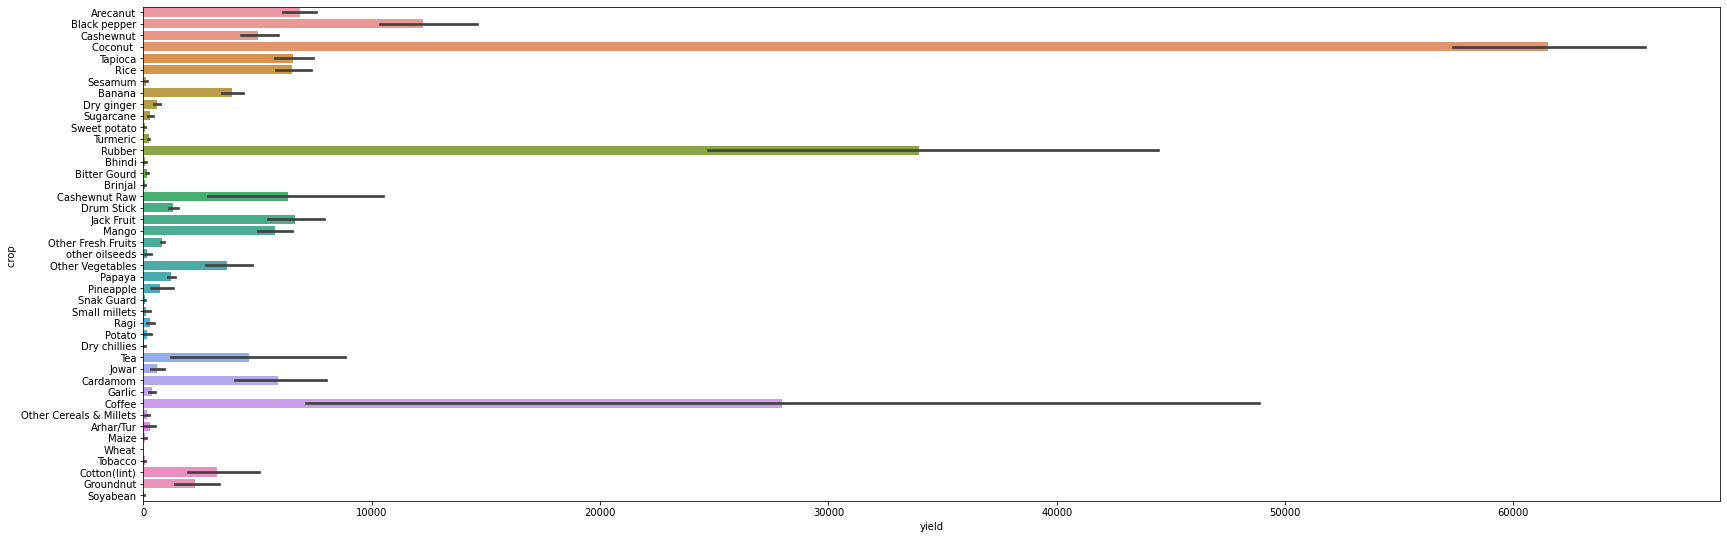

In [96]:
plt.rcParams['figure.figsize'] = (130, 20)

plt.subplot(2, 4, 1)
sns.barplot(crop_data['Area'], crop_data['Crop'])
plt.ylabel('crop ')
plt.xlabel('yield', fontsize = 10)
plt.yticks(fontsize = 10)


In [97]:
df=crop_data[crop_data['Crop'] == 'Rice'].head()
df

State_Name  District_Name  Crop_Year  Season  Crop     Area  Production  \
5      Kerala              1       1998       1  Rice   8719.0     17570.0   
7      Kerala              1       1998       3  Rice  19058.0     58013.0   
18     Kerala              1       1998       4  Rice   7348.0     16098.0   
19     Kerala              1       1999       1  Rice   8233.0     24776.0   
21     Kerala              1       1999       3  Rice  16404.0     39718.0   

       Yield  
5   2.015139  
7   3.044024  
18  2.190800  
19  3.009353  
21  2.421239

In [98]:
# Import label encoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder
categ = ['Crop']

# Encode Categorical Columns
le = LabelEncoder()
crop_data[categ] = crop_data[categ].apply(le.fit_transform)



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [99]:
data = crop_data.drop(['State_Name','Crop_Year','Production'],axis=1)

In [100]:
data.head()

District_Name  Season  Crop     Area      Yield
0              1       0     0   2253.0   0.673768
1              1       0     5   2235.0   0.110962
2              1       0     8   7205.0   0.327273
3              1       0    10  77893.0   5.122412
4              1       0    37   3911.0  18.949118

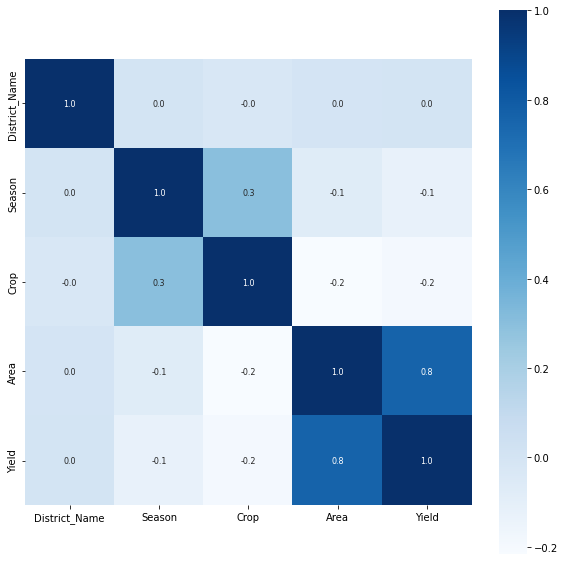

In [101]:
correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [102]:
x = data.drop(columns=['Yield'], axis=1)
y = data['Yield']

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (4003, 4)
Shape of y: (4003,)


In [103]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
print(x_train)
print(y_train)

      District_Name  Season  Crop     Area
4042             14       0    26     37.0
2934             10       2    19   3065.0
1259              5       4    29   3420.0
3729             13       0    10  85480.0
2459              9       0    15    184.0
...             ...     ...   ...      ...
3837             13       3    29   8721.0
1716              6       0     2   2053.0
2720             10       0     0   4425.0
2754             10       0     5   4844.0
3452             12       0     8   2461.0

[3202 rows x 4 columns]
4042       4.567568
2934       0.509951
1259       1.839181
3729    6375.760412
2459       2.141304
           ...     
3837       3.024194
1716       6.412567
2720       0.753898
2754       0.168869
3452       0.401463
Name: Yield, Length: 3202, dtype: float64


In [104]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 13)
model.fit(x_train,y_train)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))
pr = model.predict(x_test)
#print(pr)

Training Accuracy : 0.9836622702767965
Testing Accuracy : 0.9650716486270623


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Random Forest Regression')

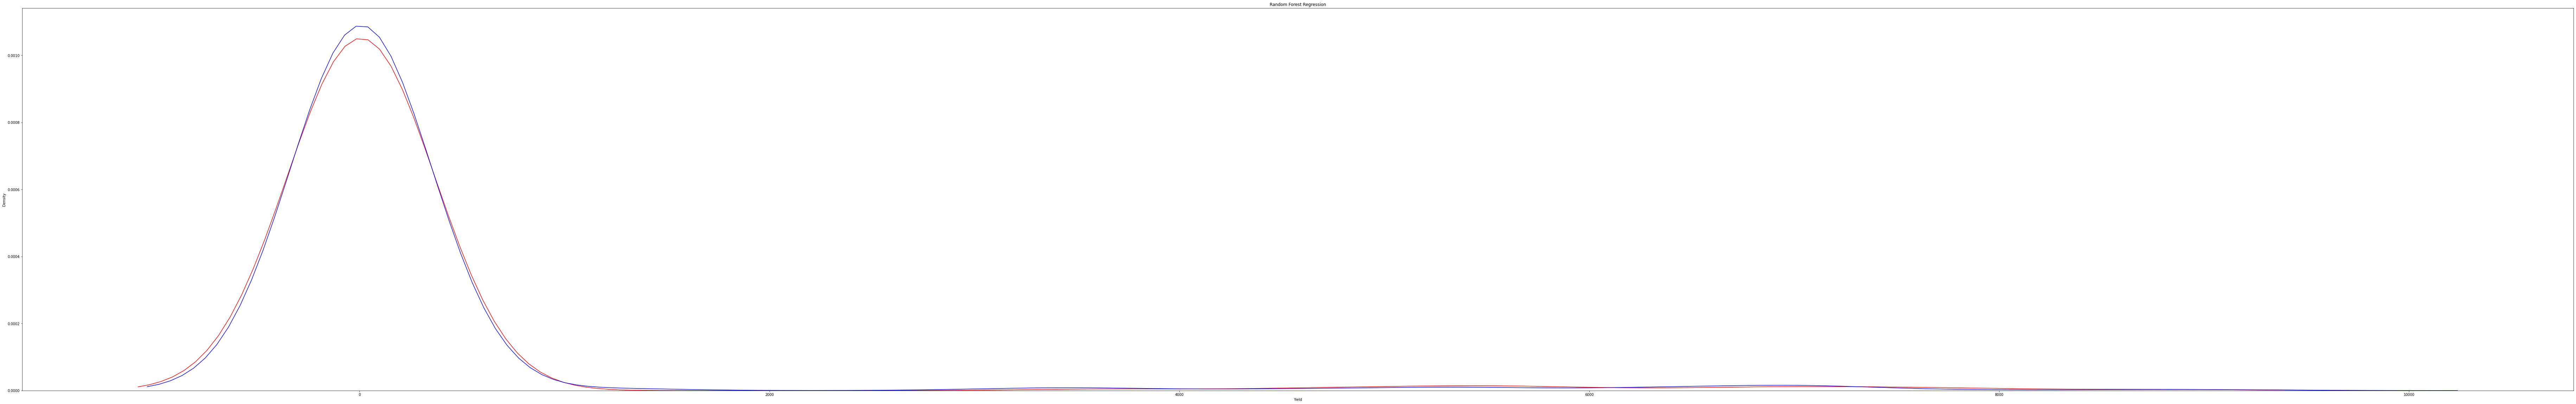

In [105]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(pr, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Random Forest Regression')

In [106]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train,y_train)

print("Training Accuracy :", model1.score(x_train, y_train))
print("Testing Accuracy :", model1.score(x_test, y_test))

Training Accuracy : 0.6028597237733926
Testing Accuracy : 0.49681913572700864


In [107]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 5)
regressor.fit(x_train,y_train)

print("Training Accuracy :", regressor.score(x_train, y_train))
print("Testing Accuracy :", regressor.score(x_test, y_test))


Training Accuracy : 0.9999949301465697
Testing Accuracy : 0.9444111034568283


In [108]:
data

District_Name  Season  Crop     Area      Yield
0                 1       0     0   2253.0   0.673768
1                 1       0     5   2235.0   0.110962
2                 1       0     8   7205.0   0.327273
3                 1       0    10  77893.0   5.122412
4                 1       0    37   3911.0  18.949118
...             ...     ...   ...      ...        ...
4255             14       0    31      1.0   0.450000
4257             14       0    36      8.0  15.875000
4258             14       0    37   2327.0  42.882682
4259             14       0    40    161.0   2.987578
4260             14       4    29   8651.0   2.696104

[4003 rows x 5 columns]

In [109]:
prediction = regressor.predict((np.array([[1,
                                       0,
                                       0,
                                       2253,
                                       ]])))
print("The Suggested Yeild for Given Season is :", prediction)

The Suggested Yeild for Given Season is : [0.67376831]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [110]:
prediction = regressor.predict((np.array([[1,0,5,2253]])))
print("The Suggested Yeild for Given Season is :", prediction)

The Suggested Yeild for Given Season is : [0.11096197]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [111]:
#pickle.dump(model,open('RFregressor.pkl','wb'))

In [112]:
#model1=pickle.load(open('RFregressor.pkl','rb'))